In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_grades = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\student grades FE.csv")
df_grades.head()

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Musawer Afzal\AppData\Local\Temp\ipykernel_7948\2415457720.py:1: SyntaxWarning: invalid escape sequence '\C'
  df_grades = pd.read_csv("D:\Coding\Coursera\Data Prep for ML in Python Coursera\Data-Prep-for-ML\Feature Engineering\student grades FE.csv")


,student_ID,first_name,last_name,grade_avg,faculty,tuition,OH_participated,classes_skipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8


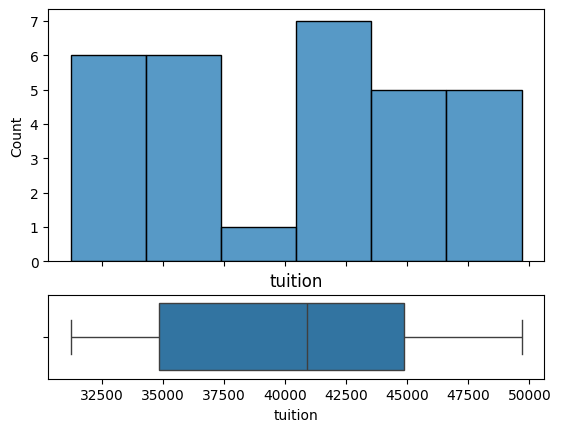

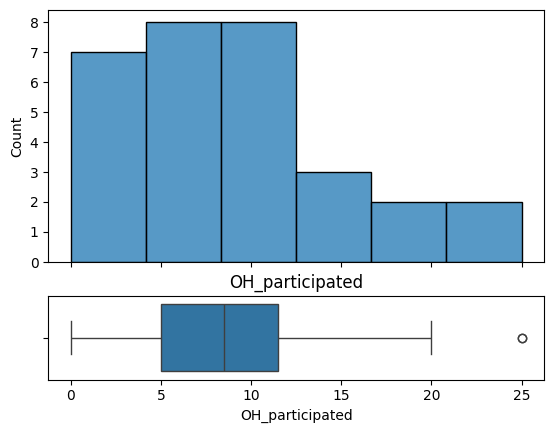

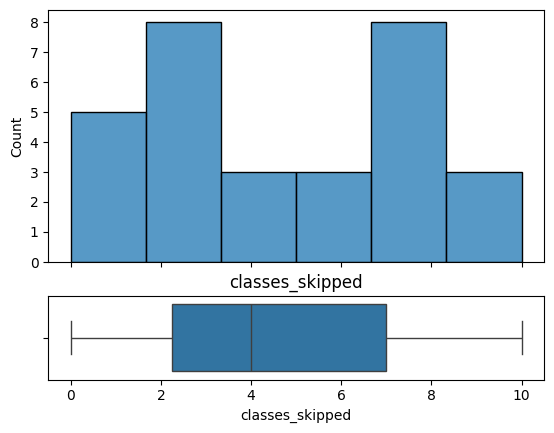

In [7]:
outlier_cols = ['tuition', 'OH_participated', 'classes_skipped']
 
for feature in outlier_cols:
    fig, (hist, box) = plt.subplots(2, 1,sharex=True,gridspec_kw={'height_ratios': [3, 1]})
    plt.title(feature)
    sns.histplot(df_grades[feature],ax=hist)
    sns.boxplot(data=df_grades[feature],orient='h',ax=box)

### We have an outlier in OH_Participated. We can either ignore it or fix it
### Using iqr rule can be better for the long term
### The Upper wisker is calculated using 
- 75% + 1.5 * IQR
### Lower wisker as
- 25% + 1.5 * IQR

In [9]:
q1 = np.percentile(df_grades['OH_participated'], 25)
q3 = np.percentile(df_grades['OH_participated'], 75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr

df_grades_removeout = df_grades[df_grades['OH_participated'] <= upper_limit]
df_grades_removeout

,student_ID,first_name,last_name,grade_avg,faculty,tuition,OH_participated,classes_skipped
0,20123456,John,Park,B,Arts,44191,0,5
1,20123457,Alex,Great,B,Science,32245,4,10
2,20123458,Sebastian,Taylor,B,Business,42679,6,7
3,20123459,Michael,Bay,A,Math,46478,15,2
4,20123460,Scott,Foster,A,Engineering,36784,5,8
5,20123461,Amy,Winehouse,B,Arts,36537,10,3
6,20123462,Ralph,Wiggins,B,Business,40762,2,8
7,20123463,Homer,Simpson,C,Engineering,47669,4,7
8,20123464,Marge,Simpson,B,Math,39429,10,3
9,20123465,Peter,Gryffin,D,Arts,31956,7,7
